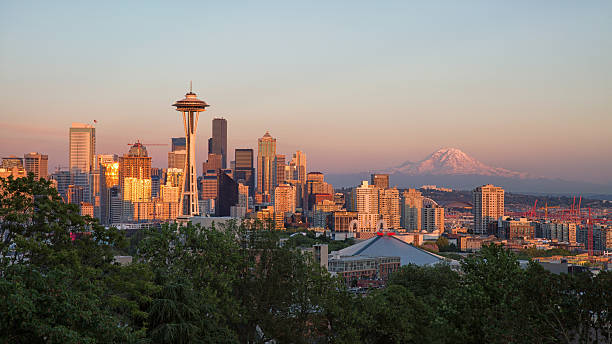

# King County Real Estate

## 1. Overview

This notebook examines King County, WA dataset of houses and reviews how and what renovations add value to a house's sale price. 

## 2. Business Problem

The goal is to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

## 3. Data Understanding

The data comes from the official King County WA website: kingcounty.gov and more specifically from the section King County Department of Assessments. 
More information can be found here: https://info.kingcounty.gov/assessor/DataDownload/default.aspx 


This dataset contains information about house sales in King County WA. It includes the following columns:
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price. This criteria will be the prediction target.
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the house
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors in house
* `waterfront` - Indicates if the house is on a waterfront
* `greenbelt` - Indicates if the house is near to an area of open natural, undeveloped land
* `nuisance` - Indicates if the house has traffic noise or other nuisances
* `view` - Quality of view from house
* `condition` - Overall condition of the house
* `grade` - Overall grade of the house
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - Street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

### 3. a- Loading the data using pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
import seaborn as sns
import sqlite3
import warnings
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
kc_house_df = pd.read_csv("data/kc_house_data.csv")

## 4. Data Preparation

In [3]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

The dataset has:
- 25 columns: 10 integers, 5 float, 10 objects.
- 30155 rows. 'heat_source' is the field with the highest amount of null-values: 32. Dropping them allows to keep 99.9% of the data, they were dropped without deteriorating. 



### 4. a- Dropping null values

In [4]:
# Dropping null values
kc_house_df.dropna(inplace=True)

In [5]:
# Verifying null values were dropped
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [6]:
# Inspecting statistics about the dataset 
kc_house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


The mean price is $1,108,971 for houses of over 3 bedrooms and 2 bathrooms, with a living space of 2,113 square feet on average and 1,810 square feet above the basement. 
The average year built is 1975. The dataset contains houses built from 1900 to 2022. 

In [7]:
# Inspecting the dataset 
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### 4. b- Removing unnecessary columns



The columns below are removed because they do not provide any value to the analysis to understand what renovations add value to a house.
\
Anything pertaining to the house location can be removed: will not have impact on renovations.
- lat 
- long
- address 
- greenbelt
- waterfront
- view

---------------------

Anything pertaining to dataset admin can be removed 
- id 
- date (date house was sold) 
- yr_renovated

In [8]:
unnecessary_columns = ["lat", "long", "address", "greenbelt", "waterfront", "view", "id", "date", "yr_renovated"]

In [9]:
kc_house_df = kc_house_df.drop(columns=kc_house_df[unnecessary_columns])

In [10]:
# Verifying new columns
kc_house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system',
       'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built'],
      dtype='object')

In [11]:
len(kc_house_df.columns)

16

The dataset now has 16 columns

## 5. Simple Linear Regression Model: Initial Baseline 

A simple linear regression model is a statistical method used to model the relationship between two variables: a dependent variable (the target - here, a house’s sale price) and an independent variable (the predictor). The goal of simple linear regression is to find the best-fitting linear equation that describes the relationship between these variables.


1. **Purpose**: Simple linear regression is used to understand and quantify the relationship between two variables. It helps predict the value of the dependent variable based on the value of the independent variable.

2. **Assumptions**: The model assumes a linear relationship between the variables, constant variance of errors (homoscedasticity), and normally distributed residuals.


### 5. a- Identifying a highly correlated predictor

The target variable is price. Looking at correlation coefficients for all predictor variables to find the one with the highest correlation with price.

In [12]:
kc_house_df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
Name: price, dtype: float64

Looking at correlation coefficients for all predictor variables to find the one with the highest correlation with price.

In [13]:
most_correlated = "sqft_living"

### 5. b- Visualizing the predictor vs price

Since the price data points have a high concentration around the short range of square footage, a regression line is calculated to include into the scatter plot and make the graph more easy to read.

In [14]:
# Calculating regression line

x = kc_house_df["sqft_living"].array
y= kc_house_df["price"].array

m, b = np.polyfit(x, y, 1) 

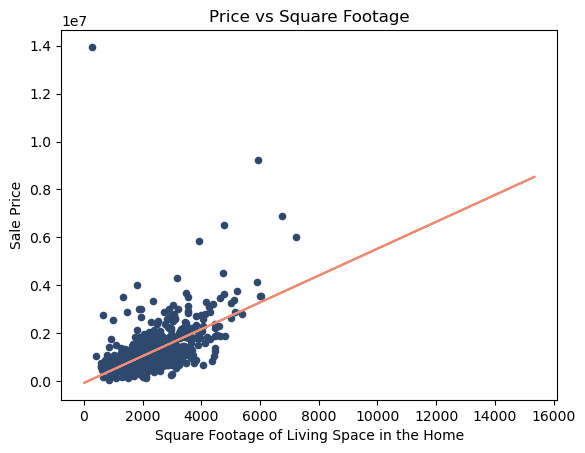

In [15]:
# Plotting scatter plot
# Plotting a sample of 1000 data points, most_correlated vs. price
kc_house_df.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price", color="#2f496e")

# Plotting regression line
plt.plot(x, m*x+b, color='#ed8c72')

# Defining titles and legend
plt.title('Price vs Square Footage')
plt.xlabel('Square Footage of Living Space in the Home')
plt.ylabel('Sale Price')
plt.show();

While outliers can be identified on the sale price, the variables of a house's price and square footage of living space seem to have a linear relationship with one another, confirming a simple linear regression model can be calculated. 

### 5. c- Setting up variables for regression

Declaring y and X_baseline variables, where y is a Series containing price data and X_baseline is a DataFrame containing the column with the strongest correlation. As defined before, the latter is sqft_living.

In [16]:
y = kc_house_df["price"]

X_baseline = kc_house_df[[most_correlated]]

### 5. d- Creating and fitting simple linear regression

In [17]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

### 5. e- Evaluating and interpreting baseline regression results

In [18]:
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:07:27   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

sqft_living was the attribute the most strongly correlated with price. Consequently, the model is describing the relationship between both variables. 


1. **Adj. R-squared**: Overall, the model is not very significant and explains only 37% of the price's variance. 
 
2. **Coef and p-values (P>|t|)**: The coefficient for sqft_living is about \\$560.5134. This means that for each additional square foot of living space in the home, the price would increase by a little over \\$560. The p-value associated for the coefficient is equal to 0, indicating that the variable has a statistically significant impact on price. 

3. **Constant coef**: The intercept is \-$75,590, meaning that a zero square foot living house would sell for \\$-75,590 - which is not representative as a house would not sell for a negative value, and would not have 0 square foot.

In conclusion, this model suggests that the square footage of living space in a house is a statistically significant predictor of the price. For each additional square footage added to a house, the predicted price increases by around \\$560.51. 
Nevertheless, the low adjusted r-squared value indicates that the model is not significant and would benefit from being improved. 

In addition, other statistics avaiable question the assumption of linear regression. These will be more detailed among the future models.

### 5. f- Calculating and interpreting the model's mean absolute error

In [19]:
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

396271.4457372302

The mean absolute error is a common metric used to evaluate the performance of a regression model. It quantifies the average absolute difference between the predicted values and the actual (true) values.

A lower mean absolute error indicates that the model's predictions are closer to the actual values. In the opposite, the MAE of around 396271.445 implies that, on average, the baseline model's predictions have an absolute difference of approximately $396,271.445 from the actual target values. This confirms the poor performance of the initial baseline regression model's results. 

## 6. Data Transformation

### 6. a- Visualizing the distribution of target variable price

C:\Users\albane.colmenares\AppData\Local\Temp\ipykernel_6352\2417868387.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(new_xticklabels)


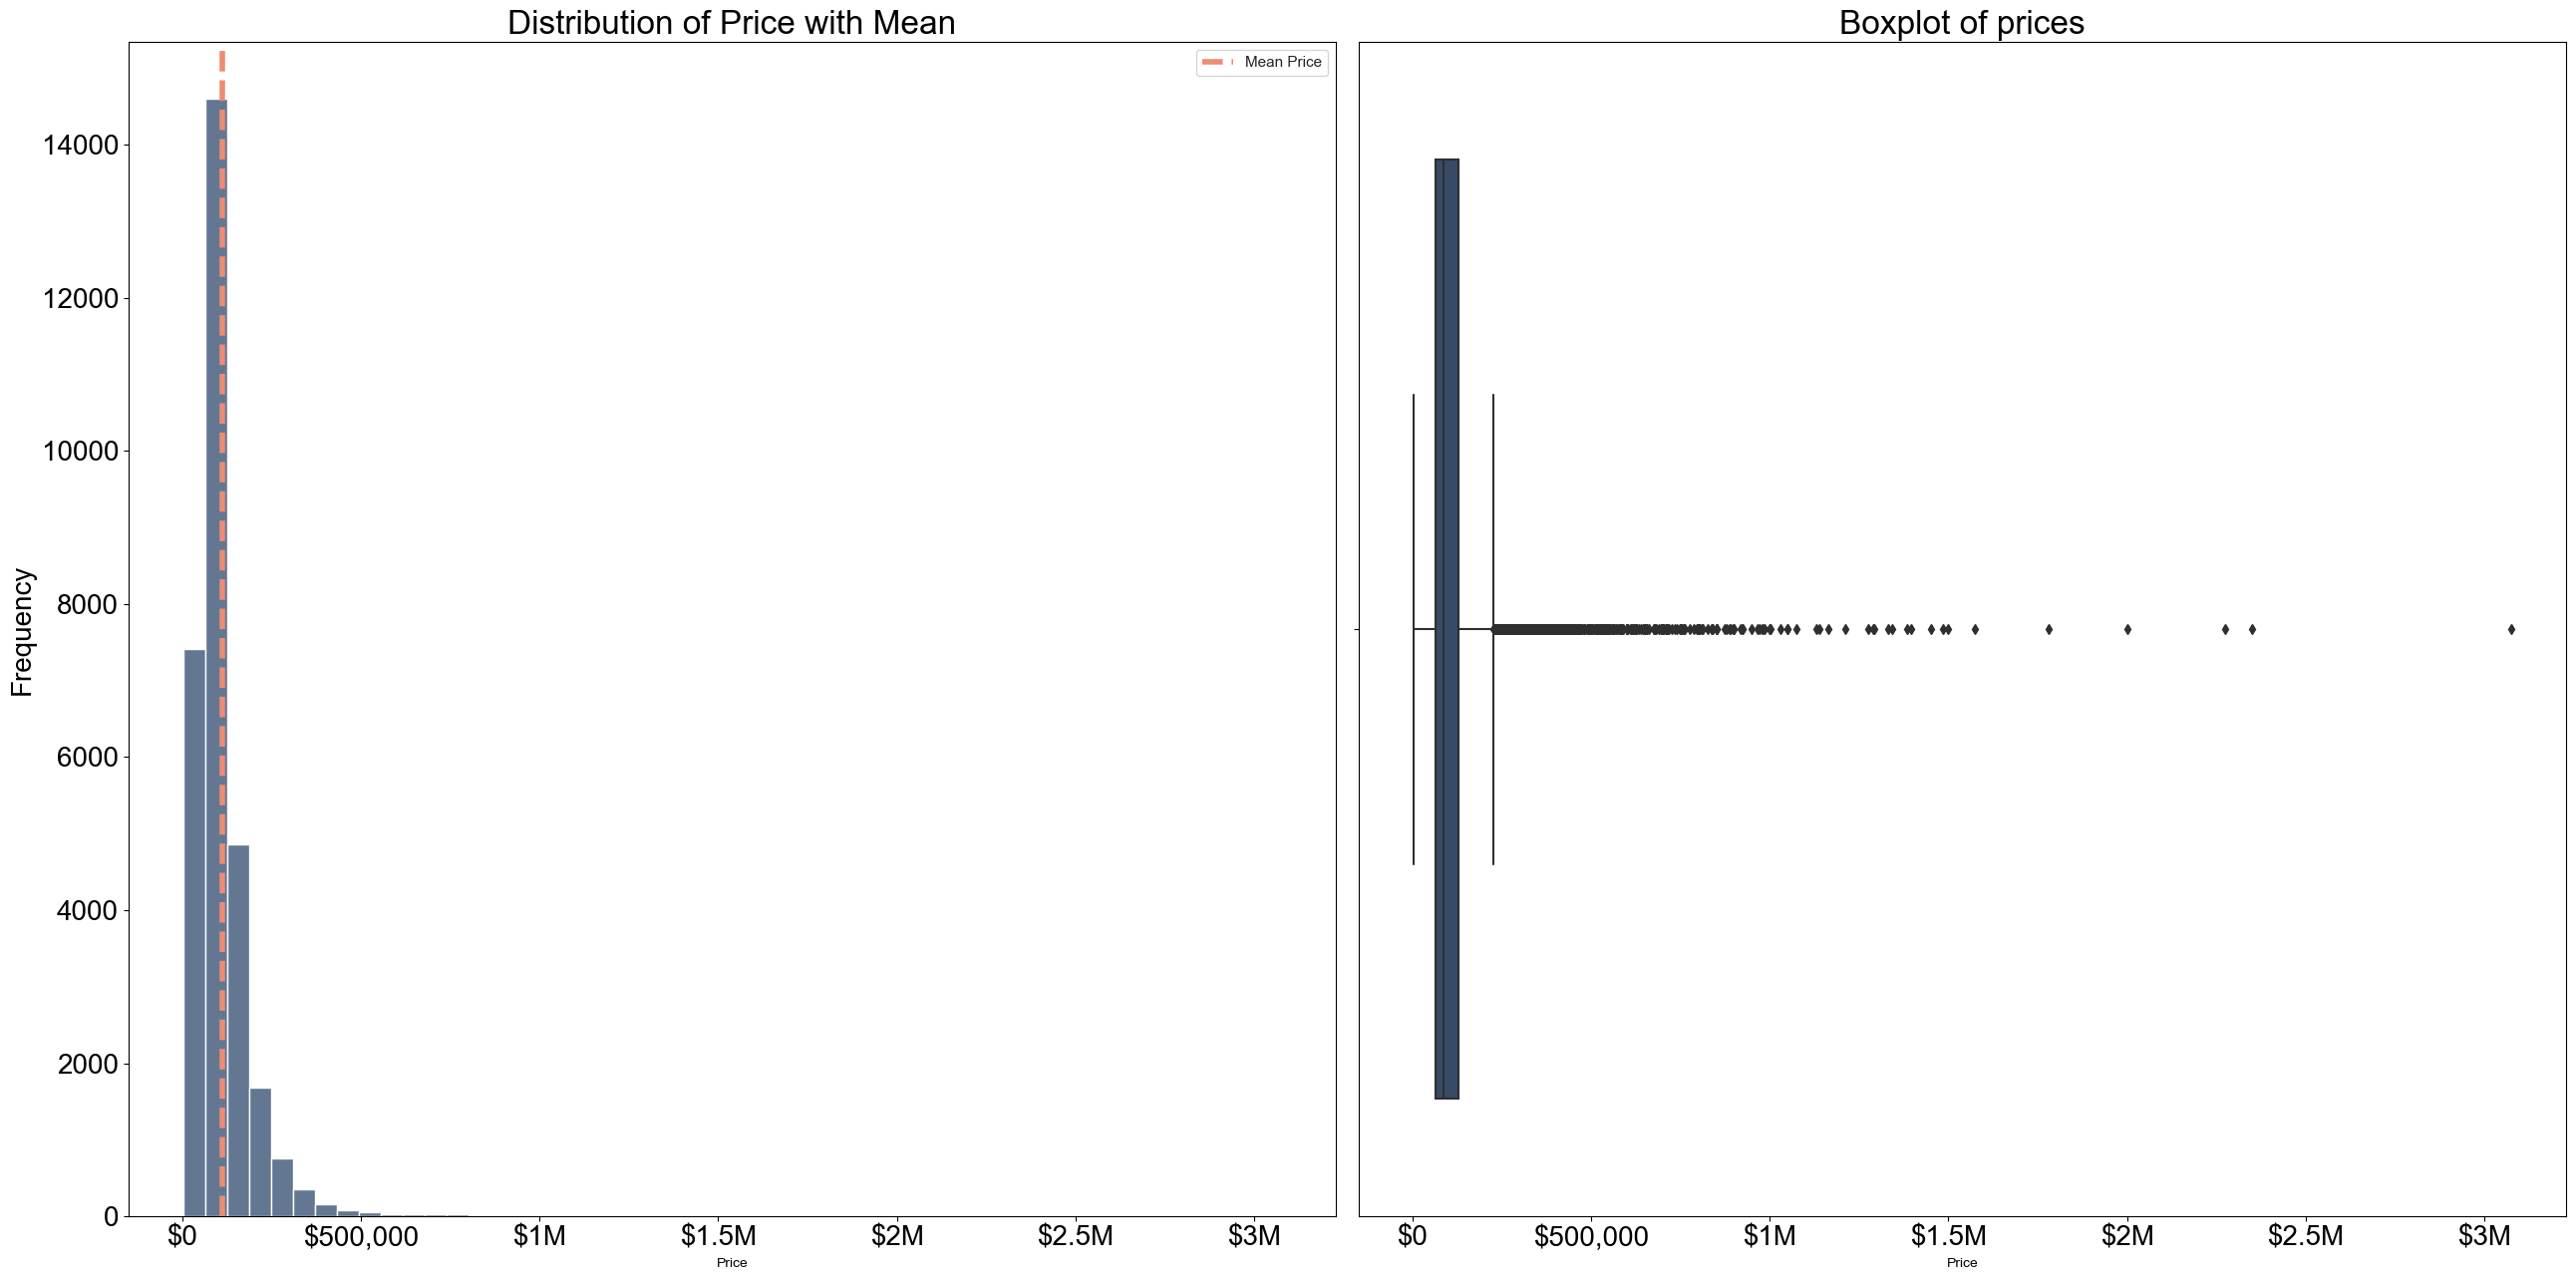

In [20]:
# Creating a figure with two subplots in one row and two columns

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(26,13))

# Setting style
sns.set(style="white")


# First subplot: histplot and the mean price
sns.histplot(ax=axes[0], data=kc_house_df, x="price", bins=50, color='#2f496e')
mean_price = kc_house_df["price"].mean()
axes[0].axvline(x=mean_price, color='#ed8c72', linestyle='--', label='Mean Price', linewidth=4)

# First subplot formatting
title_font = {'size': 24}
axes[0].set_title("Distribution of Price with Mean", fontdict=title_font)
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency", fontsize=20)
axes[0].legend()

# Getting the current axes

# Setting the tick positions and labels
new_xticklabels = ["--", "$0", "$500,000", "$1M", "$1.5M", "$2M", "$2.5M", "$3M", "$3.5M"]
# axes[0].set_xticks(range(len(new_xticklabels)))
# font = {'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 24}

axes[0].tick_params(labelsize=20)
axes[0].set_xticklabels(new_xticklabels)



# Second subplot: boxplot
sns.boxplot(ax=axes[1], data=kc_house_df, x="price", color='#2f496e')

# Second subplot formatting 
axes[1].set_title("Boxplot of prices", fontdict=title_font)
axes[1].set_xlabel("Price")
axes[1].tick_params(labelsize=20)


# Adjusting layout
plt.tight_layout()

plt.show()


In [21]:
median_price = kc_house_df["price"].median()
median_price = "${:,.0f}".format(median_price)

In [22]:
mean_price = "${:,.0f}".format(mean_price)

In [23]:
print(f"The highest number of houses are sold below the mean price of {mean_price}. The mean is higher than the median ({median_price}) which indicates the distribution of the dataset is skewed to the right. There are less prices sold a higher prices, but the prices are so high compared to the most common sales prices that the mean overestimates the most common values.")

The highest number of houses are sold below the mean price of $1,108,971. The mean is higher than the median ($860,000) which indicates the distribution of the dataset is skewed to the right. There are less prices sold a higher prices, but the prices are so high compared to the most common sales prices that the mean overestimates the most common values.


The prices outliers will be identified and excluded to improve the model.  

### 6. b- Identifying and excluding outliers 

#### Sales prices were considered outliers when outside of the 5th percentile
The 5th percentile value was chosen as a standard percentile value to define outliers. The below cells display how they were calculated. 

In [24]:
min_price = kc_house_df["price"].min()
max_price = kc_house_df["price"].max()

In [25]:
lower_limit = np.percentile(kc_house_df["price"], 0.5)
upper_limit = np.percentile(kc_house_df["price"], 99.5)

In [26]:
# Ensuring that the lower limit defined is not lower than the minimum price in the dataset
assert min_price < lower_limit

# Ensuring that the upper limit defined is not higher than the maximum price in the dataset
assert max_price > upper_limit

In [27]:
# Now modifying the dataset excluding prices'outliers 
kc_house_df = kc_house_df[(kc_house_df["price"] > lower_limit) & (kc_house_df["price"] < upper_limit)]

In [28]:
# Verifying the new minimum and maximum prices 
print(kc_house_df["price"].min())
print(kc_house_df["price"].max())

131106.0
5650000.0


### 6. c- Verifying the new distribution of target variable price

C:\Users\albane.colmenares\AppData\Local\Temp\ipykernel_6352\3034450714.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(new_xticklabels)


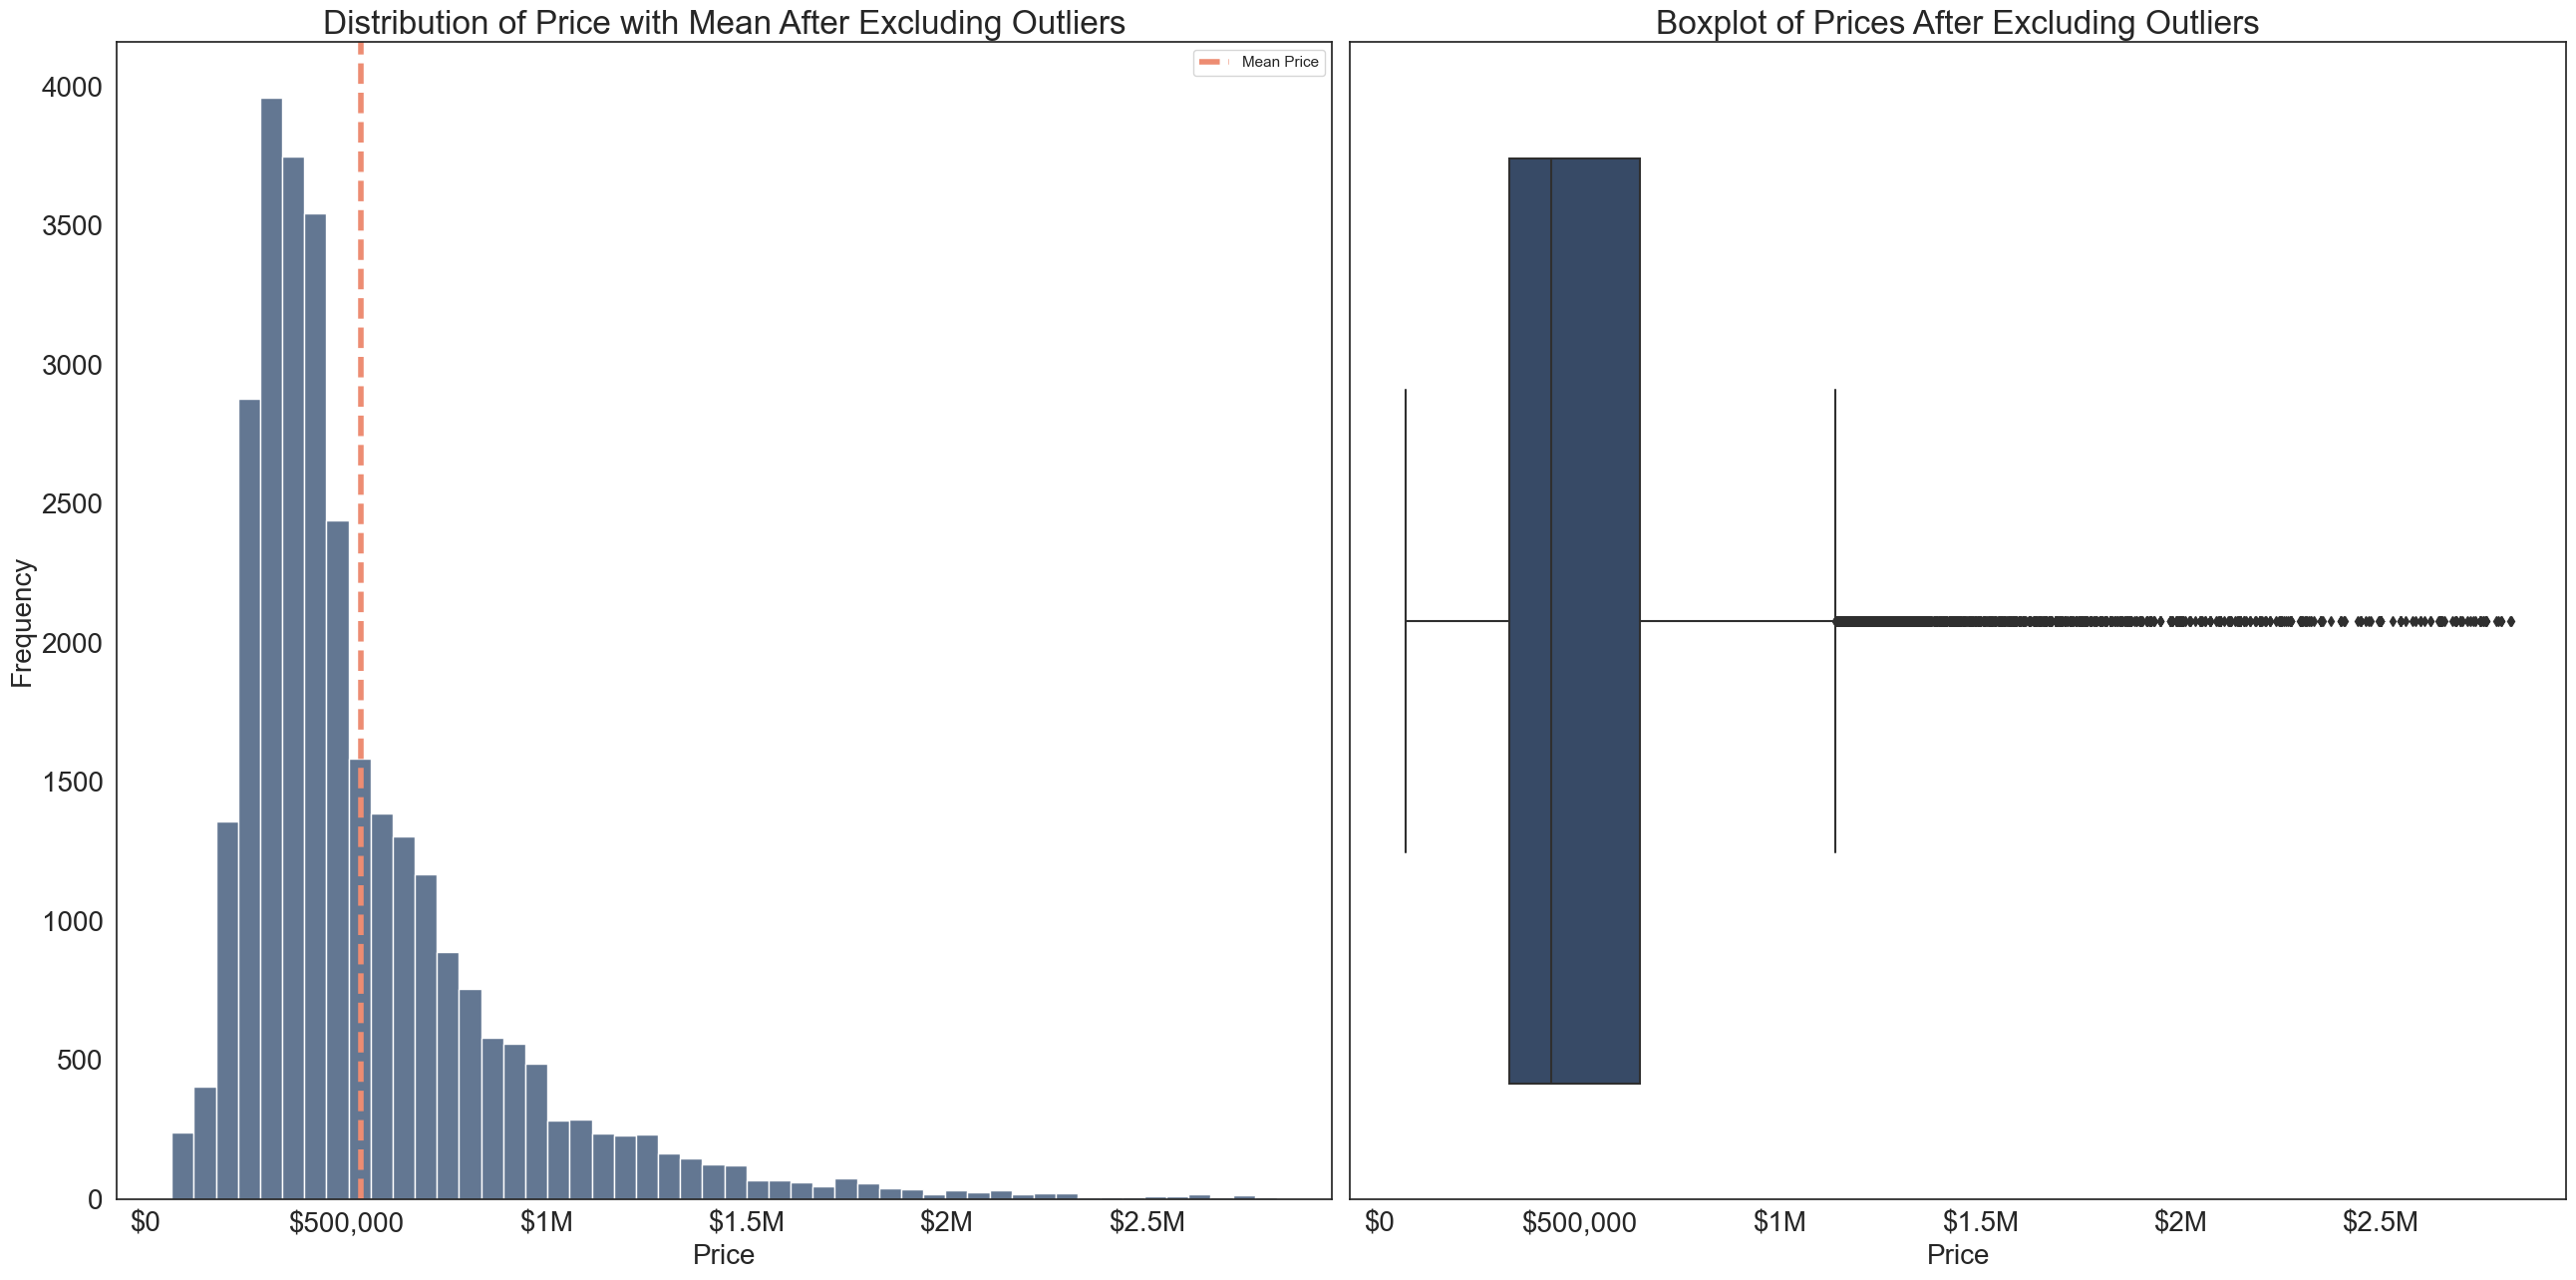

In [29]:
# Creating a figure with two subplots in one row and two columns

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(26,13))

# Setting style
sns.set(style="white")


# First subplot: histplot andthe mean price
sns.histplot(ax=axes[0], data=kc_house_df, x="price", bins=50, color='#2f496e')
mean_price = kc_house_df["price"].mean()
axes[0].axvline(x=mean_price, color='#ed8c72', linestyle='--', label='Mean Price', linewidth=4)

# First subplot formatting
title_font = {'size': 24}
axes[0].set_title("Distribution of Price with Mean After Excluding Outliers", fontdict=title_font)
axes[0].set_xlabel("Price", fontsize=20)
axes[0].set_ylabel("Frequency", fontsize=20)
axes[0].legend()

# Getting the current axes

# Setting the tick positions and labels
new_xticklabels = ["--", "$0", "$500,000", "$1M", "$1.5M", "$2M", "$2.5M", "$3M", "$3.5M"]
# font = {'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 24}

axes[0].tick_params(labelsize=20)
axes[0].set_xticklabels(new_xticklabels)


# Second subplot: boxplot
sns.boxplot(ax=axes[1], data=kc_house_df, x="price", color='#2f496e')

# Second subplot formatting 
axes[1].set_title("Boxplot of Prices After Excluding Outliers", fontdict=title_font)
axes[1].set_xlabel("Price", fontsize=20)
axes[1].tick_params(labelsize=20)


# Adjust layout
plt.tight_layout()

# Save the plot in images folder 
plt.savefig('images/distribution.png', dpi=300)


plt.show()


The distribution of the dataset seems now more equally distributed in the sense that outliers account for a lower portion of the data. Nevertheless, it still seems skewed and not to represent a normal distribution. 

## 7. Second Simple Linear Regression: Without Outliers

### 7. a- Setting up variables for regression

The dependent and independent variables are the same: y is the house's sale price and X_baseline, sqft_living.

In [30]:
# Declaring the variables once again for clarity
y = kc_house_df["price"]

new_X_baseline = kc_house_df[[most_correlated]]

### 7. b- Creating and fitting simple linear regression

In [31]:
new_baseline_model = sm.OLS(y, sm.add_constant(new_X_baseline))
new_baseline_results = new_baseline_model.fit()

### 7. c- Evaluating and interpreting baseline regression results

In [32]:
new_baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                 2.226e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:07:30   Log-Likelihood:            -4.3442e+05
No. Observations:               29807   AIC:                         8.689e+05
Df Residuals:                   29805   BIC:                         8.689e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.733e+04   7337.847     10.539      0.000    6.29e+04    9.17e+04
sqft_living   475.9234      3.190    149.204      0.000     469.671     482.175
==============================================================================
Omnibus:                    12050.548   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98988.100
Skew:                           1.734   Prob(JB):                         0.00
Kurtosis:                      11.227   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


1. **Adjusted R-squared**: Removing the outliers highly improved the model which now explains 42.8% of the price's variance that can be explained by square foot living. 

2. **Coef and p-values (P<|t|)**: Because outliers were removed, the coefficient decreased to 475.9234, indicating that the selling price would increase by a lower amount than previously recorded: \$475.92. The p-value of 0 confirms the square footage of living space in the house has a significant impact on the price. 

3. **Constant coef**: The intercept value is now 77330, indicating the estimated price when the square footage of living space in the house is at 0 is \$77,330 - which is much more realistic than the previously recorded negative number.  

4. **F-statistic and Prob (F-statistic)**: A high F-statistic combined with a low p-value suggests that the model's overall fit is statistically significant. p-values were at 0 on both models, but F-statistic increased compared to the previous simple linear regression: 22,260 vs 17,710. This confirms the model improved from the inital one. 


### 7. d- Calculating and interpreting model's mean absolute error

In [33]:
new_baseline_mae = mean_absolute_error(y, new_baseline_results.predict(sm.add_constant(new_X_baseline)))
baseline_mae, new_baseline_mae

# new_baseline_mae - baseline_mae
baseline_mae, new_baseline_mae

(396271.4457372302, 355912.7383624806)

The new MAE is 40,358 less than the previous one, indicating the model's predictions are closer to the actual values. 
The new baseline model's predictions have an absolute difference of approximately $355,912 from the actual target values.

The range of sales prices is extremely large: it goes from \\$131,106 to \\$5,650,000. This would make this MAE acceptable in a real-world context. Nevertheless, this model takes only one variable into account. In addition scaling the data could help improve prediction accuracy.

## 8. Multiple Linear Regression - Categorical Features

### 8. a- Inspecting categorical features

In [34]:
# Inspecting each categorical feature to understand their attributes
categoricals = kc_house_df.select_dtypes(include=[object])

for col in categoricals:
    print(kc_house_df[col].value_counts(), "\n")

NO     24646
YES     5161
Name: nuisance, dtype: int64 

Average      18301
Good          7988
Very Good     3237
Fair           224
Poor            57
Name: condition, dtype: int64 

7 Average        11615
8 Good            9352
9 Better          3791
6 Low Average     2807
10 Very Good      1344
5 Fair             381
11 Excellent       362
12 Luxury           92
4 Low               45
13 Mansion           9
3 Poor               8
2 Substandard        1
Name: grade, dtype: int64 

Gas                  20382
Electricity           6389
Oil                   2865
Gas/Solar               90
Electricity/Solar       58
Other                   19
Oil/Solar                4
Name: heat_source, dtype: int64 

PUBLIC                25501
PRIVATE                4299
PRIVATE RESTRICTED        4
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64 



There are 5 columns with categorical data:
* nuisance
* condition 
* grade
* heat_source 
* sewer_system

Nuisance's response is binary: yes or no. Condition and grade provide a rating system from poor to luxury. Rating includes some specific to the house type, i.e. mansion. 

Heat source and sewer system's responses refer to options specific to each category, i.e. gas, electricity as heat sources in the house.

### 8. b- Identifying a promising predictor

In [35]:
categorical_features = categoricals.columns

In [36]:
categorical_features

Index(['nuisance', 'condition', 'grade', 'heat_source', 'sewer_system'], dtype='object')

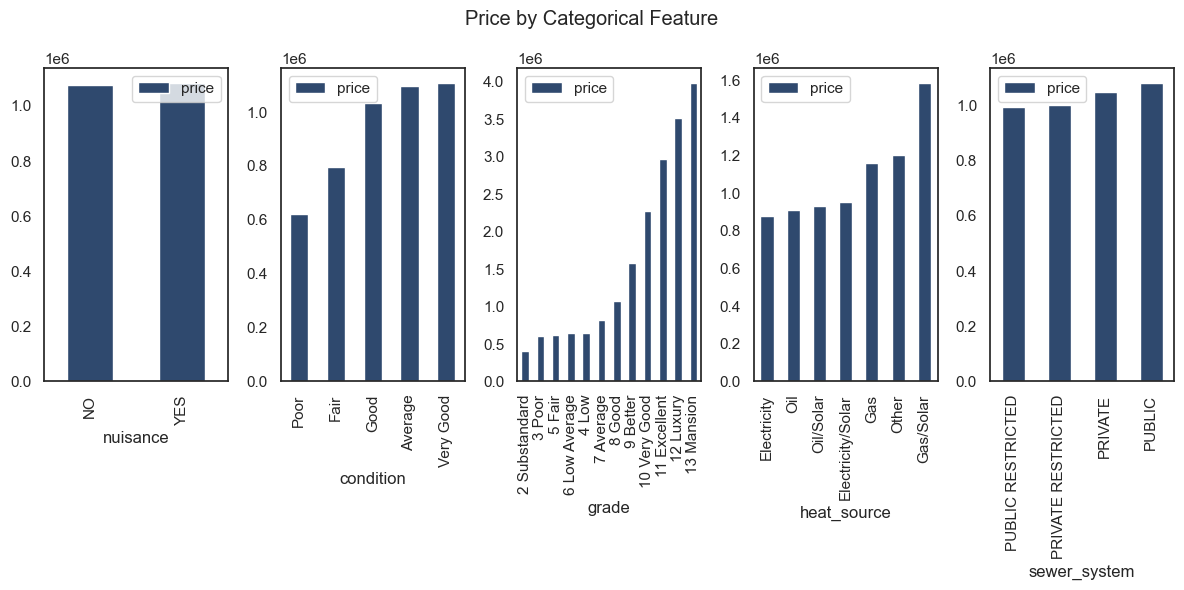

In [37]:
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12, 6))
for index, feature in enumerate(categoricals):
    kc_house_df.groupby(feature).mean().sort_values("price").plot.bar(y="price", ax=axes[index], color='#2f496e')
    
plt.suptitle("Price by Categorical Feature")

plt.tight_layout()

plt.show()

Most categorical features seem to correlate with price except for nuisance.

We will start with the overall representation: condition, as even though grade gives an idea, reaching a mansion by renovation is less likely. 

In [38]:
cat_feature = "condition"

###  8. c- Setting up variables for regression

Creating a variable X_iterated : a DataFrame containing the column with the strongest
correlation and the selected categorical feature.

In [39]:
X_iterated = kc_house_df[[most_correlated, cat_feature]]
X_iterated

,sqft_living,condition
0,1180,Good
1,2770,Average
2,2880,Average
3,2160,Average
4,1120,Average
...,...,...
30150,1910,Good
30151,2020,Average
30152,1620,Average
30153,2570,Average


### 8. d- Preprocessing categorical variable with one-hot encoding

In [40]:
X_iterated = pd.get_dummies(X_iterated, columns=[cat_feature])
X_iterated

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,0,0,1,0,0
1,2770,1,0,0,0,0
2,2880,1,0,0,0,0
3,2160,1,0,0,0,0
4,1120,1,0,0,0,0
...,...,...,...,...,...,...
30150,1910,0,0,1,0,0
30151,2020,1,0,0,0,0
30152,1620,1,0,0,0,0
30153,2570,1,0,0,0,0


In [41]:
# Dropping "condition_Poor" as a baseline, because is the lowest ranking given for a condition 
X_iterated.drop("condition_Poor", axis=1, inplace=True)
X_iterated

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Very Good
0,1180,0,0,1,0
1,2770,1,0,0,0
2,2880,1,0,0,0
3,2160,1,0,0,0
4,1120,1,0,0,0
...,...,...,...,...,...
30150,1910,0,0,1,0
30151,2020,1,0,0,0
30152,1620,1,0,0,0
30153,2570,1,0,0,0


### 8. e- Building a multiple linear regression model

Using the y variable from our previous model and X_iterated , building a model called iterated_model
and a regression results object called iterated_results .

In [42]:
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

In [43]:
coefficients = iterated_results.params[1:]
intercept = iterated_results.params[0]
print(coefficients)
print(intercept)

sqft_living               477.250792
condition_Average       51872.299370
condition_Fair          62919.975143
condition_Good          69085.793874
condition_Very Good    135739.940053
dtype: float64
8967.235833342129


### 8. f- Evaluating and interpreting regression results

In [44]:
iterated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     4478.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:07:31   Log-Likelihood:            -4.3439e+05
No. Observations:               29807   AIC:                         8.688e+05
Df Residuals:                   29801   BIC:                         8.688e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8967.2358   6.85e+04      0.131      0.896   -1.25e+05    1.43e+05
sqft_living           477.2508      3.204    148.959      0.000     470.971     483.531
condition_Average    5.187e+04   6.86e+04      0.757      0.449   -8.25e+04    1.86e+05
condition_Fair       6.292e+04   7.66e+04      0.821      0.411   -8.72e+04    2.13e+05
condition_Good       6.909e+04   6.87e+04      1.006      0.314   -6.55e+04    2.04e+05
condition_Very Good  1.357e+05    6.9e+04      1.966      0.049     440.895    2.71e+05
==============================================================================
Omnibus:                    12119.347   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100578.330
Skew:                           1.743   Prob(JB):                         0.00
Kurtosis:                      11.297   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This multiple linear regression analysis is aimed at predicting the "price" variable based on a set of independent variables: square footage of living are in the house, as well as the various rankings. 

1. **R-squared and Adjusted R-squared**: The adjusted R-squared is 0.429. This is the most significant model thus far. It explains 42.9% of the price's variance.

2. **F-statistic and Prob (F-statistic)**: The F-statistic of 4478 with a very low probability (Prob (F-statistic) = 0) indicates that at least one independent variable in the model has a significant relationship with price.

3. **Coefficients (coef) and P-values (P>|t|)**: Each coefficient represents the change in the dependent variable for a one-unit change in the corresponding independent variable, while holding other variables constant. For example:
   - "sqft_living" coefficient: An increase of 1 square foot in living area is associated with an increase of \$477.25 in price - which is consistent with the previous simple linear regression (475.92). 
   - "condition_Average" coefficient: Properties with an "Average" condition are associated with an increase of \$51,870 in price, but the p-value is not significant (p > 0.05).
   - "condition_Fair" coefficient: Properties with a "Fair" condition are associated with an increase of \$62,920 in price, but the p-value is not significant.
   - "condition_Good" coefficient: Properties with a "Good" condition are associated with an increase of \$69,090 in price, but the p-value is not significant.
   - "condition_Very Good" coefficient: Properties with a "Very Good" condition are associated with an increase of \$135,700 in price, and the p-value (0.049) indicates that this increase is statistically significant at a 5% significance level.


<u>Limits</u>

1. **Jarque-Bera, Skew, Kurtosis**: This high Jarque-Bera value combined with a low p-value indicate that the residuals are not normally distributed and  there might be issues with the model's assumptions. The skewness (1.73) suggests that the residuals are positively skewed, and the kurtosis value (11.297) indicates heavy tails in the distribution.

2. **Durbin-Watson**: The Durbin-Watson statistic of 1.935 suggests that there may be some positive autocorrelation among the residuals.

3. **Cond. No.**: The condition number provides information about multicollinearity. A high value suggests that there might be multicollinearity among the independent variables.

In conclusion, this regression analysis on categorical features indicates that the model has some explanatory power, but there may be issues with distribution assumptions, multicollinearity, and significance levels of certain independent variables. 

### 8. g- Calculating and interpreting model's mean absolute error

In [45]:
iterated_mae = mean_absolute_error(y, iterated_results.predict(sm.add_constant(X_iterated)))
baseline_mae, new_baseline_mae, iterated_mae

(396271.4457372302, 355912.7383624806, 355653.4317614562)

In [46]:
baseline_results.rsquared_adj, new_baseline_results.rsquared_adj, iterated_results.rsquared_adj

(0.37039218894923187, 0.4275443480727944, 0.4288815982113814)

This model is predicting price based on square footage of living area and the house's condition returned the highest adjusted r-squared. The Mean Absolute Error also indicates the absolute differences between predicted and actual values are the smallest of all models.

## 9. Multiple Linear Regression - Numeric Features

### 9. a- Setting up variables for regression

In [47]:
# Setting categorical column names as the variable categorical_features  
categorical_features = categoricals.columns

In [48]:
# Dropping the dependent variable - the column price, from the dataset  
house_preds = kc_house_df.drop("price", axis=1)

# Defining the independent variables: removing categorical columns from house_preds 
house_preds = house_preds.drop(categorical_features, axis=1)

# Defining the target variable: price 
house_target = kc_house_df["price"]

# Inspecting the new data
house_preds.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
0,4,1.0,1180,7140,1.0,1180,0,0,40,1969
1,5,2.5,2770,6703,1.0,1570,1570,0,240,1950
2,6,2.0,2880,6156,1.0,1580,1580,0,0,1956
3,3,3.0,2160,1400,2.0,1090,1070,200,270,2010
4,2,2.0,1120,758,2.0,1120,550,550,30,2012


We are adding another predictor call const. The value of const is alwyays 1. It is the intercept term for our regression equation. By multiplying beta to 1, the constant, we will get the raw beta. 

Now building our model. 

### 9. b- Building a multiple linear regression model

In [49]:
# Adding the constant predictor 
predictors = sm.add_constant(house_preds)

In [50]:
numeric_results = sm.OLS(house_target, predictors).fit()

### 9. c- Evaluating and interpreting regression results

In [51]:
numeric_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     2579.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:07:31   Log-Likelihood:            -4.3344e+05
No. Observations:               29807   AIC:                         8.669e+05
Df Residuals:                   29796   BIC:                         8.670e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.655e+06   2.51e+05     26.515      0.000    6.16e+06    7.15e+06
bedrooms      -1.091e+05   4041.609    -26.986      0.000   -1.17e+05   -1.01e+05
bathrooms      1.162e+05   5885.899     19.734      0.000    1.05e+05    1.28e+05
sqft_living     303.2609     13.609     22.283      0.000     276.586     329.936
sqft_lot          0.0019      0.051      0.037      0.970      -0.098       0.101
floors           3.9e+04   7124.309      5.474      0.000     2.5e+04     5.3e+04
sqft_above      202.6998     13.896     14.587      0.000     175.463     229.936
sqft_basement   101.1899     10.177      9.943      0.000      81.243     121.137
sqft_garage     -51.8612     14.017     -3.700      0.000     -79.335     -24.387
sqft_patio      159.9047     13.283     12.039      0.000     133.870     185.939
yr_built      -3343.4651    130.121    -25.695      0.000   -3598.507   -3088.423
==============================================================================
Omnibus:                    11889.713   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105797.339
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                      11.597   Cond. No.                     5.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This mutiple linear regression analysis is aimed at predicting the "price" variable based on the numeric features: the independent variables. 

1. **Adjusted R-squared**: The R-squared and adjusted R-squared values of 0.464 indicate that about 46.4% of the variance in ("price") is explained by the independent variables in the model, and that the model's significance is the highest.

2. **F-statistic and Prob (F-statistic)**: The F-statistic of 2578 with a very low probability (Prob (F-statistic) = 0) indicates that at least one of the numeric features has a significant relationship with the sales price.

3. **Coefficients (coef) and P-values (P>|t|)**: Each coefficient represents the change in the dependent variable for a one-unit change in the corresponding independent variable, while holding other variables constant. And the p-values associated with them test the null hypothesis that the varibale has a statistically significant impact on the dependent variable. Unless specified, all p-values confirmed the statistically significant impact of each feature on price. 

   - "sqft_lot":an increase of one square foot in lot area is associated with an increase of \$0.0019 on the sale price. Not only this value is very low, but the p-value is greater than 0.05 which indicates this feature does not have a significant impact on the price. For better results, this feature should be dropped to improve the model's results.    

- "bedrooms", sqft_garage and "yr_built" return negative coefficients which would indicate that increase the number of bedrooms, square feet for a garage and the higher the year built would negatively impact the sales price. 


<u> Limits </u>

1. **Jarque-Bera, Skew, Kurtosis**: Again, the high Jarque-Bera value (105797.34) associated with a low p-value (0) indicates that the residuals are not normally distributed. The skewness value (1.68) confirms the distribution is highly skewed and a high Kurtosis (11.58) validates there are heavy tails. This questions the model assumptions that the distribution is not normally distributed. 

2. **Durbin-Watson**: The Durbin-Watson statistic of 1.93, being close to 2, indicates a low risk of positive autocorrelation among the residuals, but suggests there might be some.

3. **Cond. No.**: The high condition number (5,280,000) suggests that there may be multicollinearity among the independent variables.


### 9. d- Calculating and interpreting model's mean absolute error

In [52]:
numeric_mae = mean_absolute_error(house_target, numeric_results.predict(predictors))
baseline_mae, iterated_mae, numeric_mae

(396271.4457372302, 355653.4317614562, 340763.44152917946)

In [53]:
baseline_results.rsquared_adj, iterated_results.rsquared_adj, numeric_results.rsquared_adj

(0.37039218894923187, 0.4288815982113814, 0.46381145072171526)

This model is predicting price based on the numeric features of the dataset. It returned the highest adjusted r-squared. The Mean Absolute Error also indicates the absolute differences between predicted and actual values are the smallest of all models.

## 10. Multiple Linear Regression - New Model - Numeric Features

### 10. a- Setting up variables for regression

"sqft_lot" returned a low coefficient with a high p-value, suggesting this feature does not have a significant impact on the house's sales price. 
It is being dropped to improve the model.

The target remains price, so does not need to be defined again. 

In [54]:
# Storing feature to drop in the variable "to_drop" 
to_drop = ["sqft_lot"]

# Dropping them from the predictors
new_house_preds = house_preds.drop(to_drop, axis=1)

In [55]:
# Inspecting the new data
new_house_preds.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
0,4,1.0,1180,1.0,1180,0,0,40,1969
1,5,2.5,2770,1.0,1570,1570,0,240,1950
2,6,2.0,2880,1.0,1580,1580,0,0,1956
3,3,3.0,2160,2.0,1090,1070,200,270,2010
4,2,2.0,1120,2.0,1120,550,550,30,2012


Now building our model. 

### 10. b- Building the new multiple linear regression model

In [56]:
# Adding the constant predictor 
new_predictors = sm.add_constant(new_house_preds)

In [57]:
new_numeric_results = sm.OLS(house_target, new_predictors).fit()

### 10. c- Evaluating and interpreting multiple linear regression model results

In [58]:
new_numeric_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     2866.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:07:31   Log-Likelihood:            -4.3344e+05
No. Observations:               29807   AIC:                         8.669e+05
Df Residuals:                   29797   BIC:                         8.670e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.655e+06   2.51e+05     26.518      0.000    6.16e+06    7.15e+06
bedrooms      -1.091e+05   4029.747    -27.069      0.000   -1.17e+05   -1.01e+05
bathrooms      1.161e+05   5880.475     19.750      0.000    1.05e+05    1.28e+05
sqft_living     303.2714     13.606     22.289      0.000     276.602     329.940
floors         3.898e+04   7101.652      5.489      0.000    2.51e+04    5.29e+04
sqft_above      202.7210     13.884     14.601      0.000     175.508     229.934
sqft_basement   101.1858     10.176      9.944      0.000      81.240     121.131
sqft_garage     -51.8570     14.016     -3.700      0.000     -79.330     -24.384
sqft_patio      159.9648     13.184     12.134      0.000     134.124     185.805
yr_built      -3343.4899    130.117    -25.696      0.000   -3598.524   -3088.456
==============================================================================
Omnibus:                    11890.126   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105806.429
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                      11.598   Cond. No.                     3.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# Reading all adjusted r-squared
baseline_results.rsquared_adj, new_baseline_results.rsquared_adj, iterated_results.rsquared_adj, numeric_results.rsquared_adj, new_numeric_results.rsquared_adj

(0.37039218894923187,
 0.4275443480727944,
 0.4288815982113814,
 0.46381145072171526,
 0.46382942067496613)

The model's results are very similar to the initial multilinear regression model. A few statistics show improvement of the model: 

1. **Adjusted R-squared**: the new adjusted r-squared shows a small improvement with a value of 0.46382942067496613 as opposed to 0.46381145072171526. 46.4% of the model's explanatory power is a little stronger than the previous one. 

2. **F-statistic and Prob (F-statistic)**: the F-statistic value increased to 2866 from 2579 with a p-value remaining at 0. This indicates that at least one independent variable in the model has an even stronger impact on the price than the previous model. 

3. **Coefficients and P-values (P>|t|)**: each coefficient represents the change in price for a one-unit change in the corresponding numeric, independent variable, while holding other variables constant. The p-values associated with them test the null hypothesis that the variable has a statistically significant impact on the dependent variable. All p-values were at 0, confirming the statistically significant impact of each feature on price. 

   - "bathrooms": adding one bathroom to the house is associated with an increase of \$116,200 on the sale price 
   - "sqft_living": an increase of one square foot in living area is associated with an increase of \$303.26 on the sale price   
   - "floors": adding one floor to a house is associated with an increase of \$33,9000 on the sale price 
   - "sqft_above": an increase of one square foot in the above area is associated with an increase of \$202.70 on the sale price 
   - "sqft_basement": an increase of one square foot in the basement area is associated with an increase of \$101.19 on the sale price 
   - "sqft_patio": an increase of one square foot in the patio is associated with an increase of \$159.91 on the sale price 





4. **Condition no.**: although still high (313,000), this is a considerable improvement compared to the 5,280,000 recorded on the previous model. The risk of multicollinearity among the independent variables is now lower, improving the model's validity.

<u>Limits</u> 
1. **Jarque-Bera, and Kurtosis**: both statistics slightly increased on this new model, suggesting that removing "sqft_lot" worsened the distribution of the dataset, which was already not normal. The slightly higher Kurtosis (11.598 vs 11.597) indicates slightly heavier tails. 



In summary, this final regression analysis indicates that the model has the most explanatory power among all models. The features having the most impact on sales price are bathrooms, sqft_living, floors, sqft_above, sqft_garage and sqft_patio. 
On the other hand, an increase in bedrooms sqft_garage and yr_built seem to lower the sale price. This may suggest that in order to increase the square footage of living area, the garage could be reduced or a bedroom could be turned into a larger living room to sell a house at a higher price. 

A deeper analysis by house type should be conducted to confirm this hypothesis.


Nevertheless, there may be issues with the main assumptions of a multiple linear regression regarding the fact that the dataset is not normally distributed, as well as multicollinearity of certain independent variables. 

### 10. d- Calculating and interpreting model's mean absolute error

In [60]:
new_numeric_results.rsquared_adj - numeric_results.rsquared_adj

1.7969953250873694e-05

In [61]:
new_numeric_mae = mean_absolute_error(house_target, new_numeric_results.predict(new_predictors))
baseline_mae, new_baseline_mae, iterated_mae, numeric_mae, new_numeric_mae

(396271.4457372302,
 355912.7383624806,
 355653.4317614562,
 340763.44152917946,
 340762.8513420028)

In [62]:
# Storing adjusted r-squared values from each model into variables
baseline_rsq_adj = baseline_results.rsquared_adj
new_baseline_rsq_adj = new_baseline_results.rsquared_adj
iterated_rsq_adj = iterated_results.rsquared_adj
numeric_rsq_adj = numeric_results.rsquared_adj
new_numeric_rsq_adj = new_numeric_results.rsquared_adj

The Mean Absolute Error is now the lowest reached, indicating that the predicted values are the closest they have been from the actual values. 

## 11. Summary: Visualizing Regression Models Results 

In [63]:
# transforming list to array to multiply adjusted r-squared values by 100. 
for_bar_data = [baseline_rsq_adj, new_baseline_rsq_adj, iterated_rsq_adj, numeric_rsq_adj, new_numeric_rsq_adj]
bar_data = np.array(for_bar_data)
bar_data = bar_data * 100
print(bar_data)
    

[37.03921889 42.75443481 42.88815982 46.38114507 46.38294207]


In [64]:

line_data = [baseline_mae, new_baseline_mae, iterated_mae, numeric_mae, new_numeric_mae]
x_values = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']

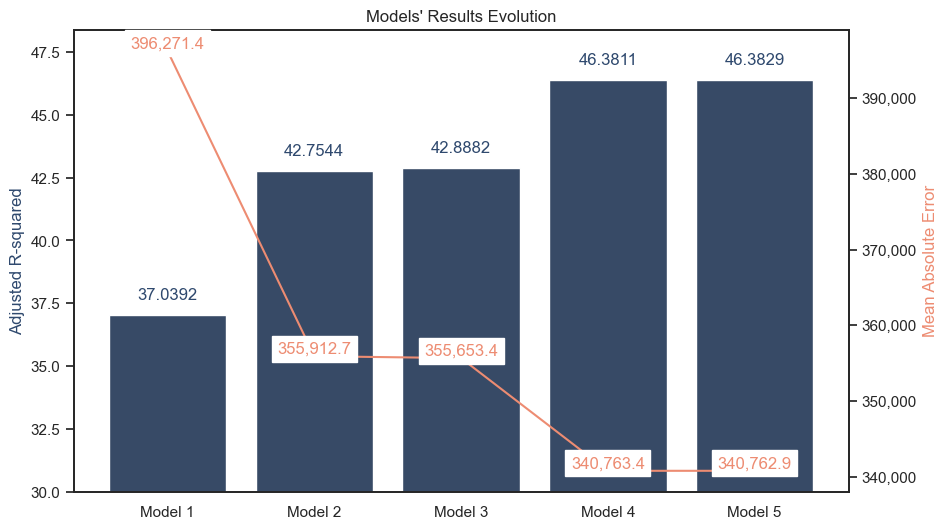

In [65]:
# Create a figure and primary axis
sns.set(style="white")

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot on the primary axis
sns.barplot(x=x_values, y=bar_data, ax=ax1, color='#2f496e')
# Set y-axis label for the bar plot
ax1.set_ylabel('Adjusted R-squared', color='#2f496e')  
# Set y-axis limits for the primary axis
ax1.set_ylim(30, max(bar_data) + 2)

# Add data labels for each bar
for i, value in enumerate(bar_data):
    ax1.text(i, value + 0.5, f'{value:.4f}', ha='center', va='bottom', color='#2f496e')

    
ax2 = ax1.twinx()

# Line plot on the secondary axis
sns.lineplot(x=x_values, y=line_data, ax=ax2, color='#ed8c72')
ax2.set_ylabel('Mean Absolute Error', color='#ed8c72')

# Format y-axis of the secondary axis with thousand separators
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))) 

# Add data labels for each bar
for i, value in enumerate(line_data):
    ax2.text(i, value + 0.1, f'{value:,.1f}', ha='center', va='bottom', color='#ed8c72', backgroundcolor='white')


plt.xlabel('Models')
plt.title("Models' Results Evolution" )

# Save the plot in images folder 
plt.savefig('images/models_results.png', dpi=300)

plt.show()


## 12. Recommendations 

The last model returned the best results to draw the below conclusions. 
As a real-estate, to improve your house's sale price:
1. Aim for a very good condition<br>
    Properties with a "Very Good" condition are associated with an increase of \$135,700 in price
<br><br>
2. Add one bathroom
    If costs and water inlet permit it.<br>
    Adding one bathroom to the house is associated with an increase of \$116,200 on the sale price
<br><br>
3. Add one floor 
    If your house has high ceilings. Consider a mezzanine if height is limited <br>
    Adding one floor to a house is associated with an increase of \$33,9000 on the sale price
<br><br>
4. Focus on the living area
    If the above changes are not doable in your house, focus on increasing the living area, by maybe reducing the space of your garage, basement, or patio. <br>
    An increase of one square foot in living area is associated with an increase of $303.26 on the sale price

## 13. Limits and Next Steps

<u>Limits</u>

The last multiple linear regression results confirmed the findings of each model: 
1. the dataset does not have a normal distribution
2. There is a rather risk of multicollinearity among the independent variables 

Both findings present a risk on the model's assumptions and may question its validity.

<u>Future Steps</u>

The dataset could be transformed into a normal distribution in order to ensure a better fit. In addition, scaling the data could improve predictions, and reducing the Mean Absolute Error. 

To address the risk of multicollinearity, some variables could be removed or grouped together. 

## ** Appendix ** 
#### Second simple linear regression after removing outliers using Interquartile Range method

<u>The Interquartile Range method to exclude outliers is used for normal distributions </u>
    
In order to reach a similar Adjusted R-squared than by removing the 5th percentile, values outside of 8 times the IQR needed to be excluded as opposed to the usual values outside 1.5 times the IQR. This is because the dataset is not normally distributed. As a consequence, this method was not kept. 


#### A. a- Identifying and excluding outliers

In [66]:
# Interquartile range method: 1. Calculating the Interquartile range
q1 = kc_house_df["price"].quantile(0.25)
q3 = kc_house_df["price"].quantile(0.75)
IQR = q3 - q1 

In [67]:
# 2. Define outlier thresholds. Typically, values outside of 1.5 times the IQR are considered potential outliers 
lower_bound = q1 - 8 * IQR 
upper_bound = q3 + 8 * IQR

In [68]:
# 3. Creating a mask to identify rows with prices that fall outside the defined thresholds 
outliers_mask = (kc_house_df["price"] < lower_bound) | (kc_house_df["price"] > upper_bound)

In [69]:
# 4. Extracting outliers
not_outliers = kc_house_df[~outliers_mask]

####  A. b- Setting Up Variables for Regression (IQR method)

In [70]:
y = not_outliers["price"]

X_baseline_IQR = not_outliers[["sqft_living"]]

####  A. c- Creating and Fitting Simple Linear Regression (IQR method)

In [71]:
baseline_model_IQR = sm.OLS(y, sm.add_constant(X_baseline_IQR))
baseline_results_IQR = baseline_model_IQR.fit()

####  A. d- Baseline Model Results (IQR method)

In [72]:
baseline_results_IQR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                 2.226e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:07:32   Log-Likelihood:            -4.3442e+05
No. Observations:               29807   AIC:                         8.689e+05
Df Residuals:                   29805   BIC:                         8.689e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.733e+04   7337.847     10.539      0.000    6.29e+04    9.17e+04
sqft_living   475.9234      3.190    149.204      0.000     469.671     482.175
==============================================================================
Omnibus:                    12050.548   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98988.100
Skew:                           1.734   Prob(JB):                         0.00
Kurtosis:                      11.227   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""